In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import pandas as pd

c:\anaconda\envs\transformers\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#dataset = pd.read_csv('Symptom2Disease.csv')
# 使用 'ISO-8859-1' 编码来读取CSV文件
dataset = pd.read_csv('Symptom2Disease.csv', encoding='ISO-8859-1')

dataset = dataset.dropna()
dataset = dataset.drop_duplicates(subset='text')
dataset = dataset[['label','text']]
dataset

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [3]:
# 获取 'label' 列中每个类别的数量
label_counts = dataset['label'].value_counts()
print(label_counts)
#print(label_counts.index)

label
Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
allergy                            50
urinary tract infection            50
Hypertension                       50
diabetes                           50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Typhoid                            50
Common Cold                        49
Cervical spondylosis               49
Chicken pox                        49
Bronchial Asthma                   49
gastroesophageal reflux disease    48
Pneumonia                          47
Migraine                           47
Arthritis                          46
Acne                               46
Malaria                            44
Dimorphic Hemorrhoids              41
Jaundice                           38
Name: count, dtype: int64


In [4]:
import numpy as np
datas = dataset
texts = np.array(datas['text'])
labels = np.array(datas['label'])
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [5]:
texts_test[126]

'Recently, when I try to walk about, I have stiffness, a stiff neck, swollen joints, and muscular weakness. Walking has also been really uncomfortable.'

In [6]:


print(labels_train[:10])


['Migraine' 'Migraine' 'Psoriasis' 'Common Cold' 'Chicken pox' 'Impetigo'
 'Fungal infection' 'Fungal infection' 'Fungal infection'
 'Cervical spondylosis']


In [7]:
#vectorize the text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [8]:
# #train the model
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()
# clf.fit(X_train, labels_train)
# labels_pred = clf.predict(X_test)
# accuracy = accuracy_score(labels_test, labels_pred)
# print('Accuracy:', accuracy)
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# from sklearn.svm import SVC
# clf = SVC()
# clf = SVC(kernel='rbf')

# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()

# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()

# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()


clf.fit(X_train, labels_train)

# 预测
labels_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(labels_test, labels_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9566473988439307


c:\anaconda\envs\transformers\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
import random
i = random.randint(0,100)
sent=vectorizer.transform(['I feel Stomache'])
print(clf.predict(sent)[0])
print(labels_test[126])

diabetes
Arthritis


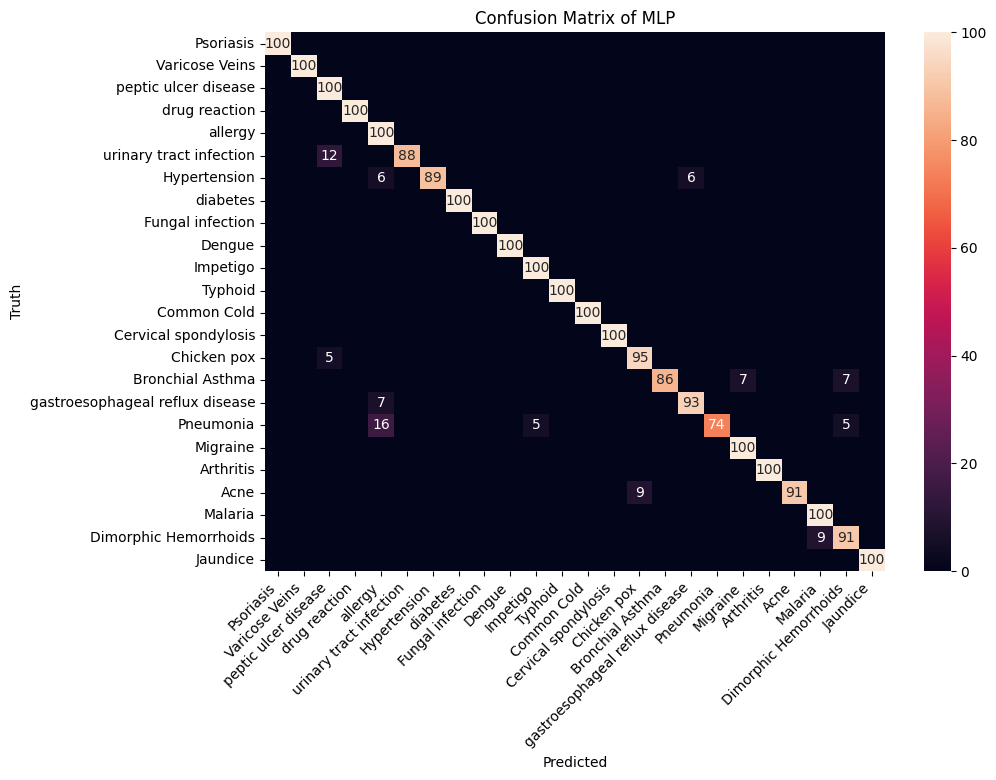

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred)

# 将混淆矩阵的每个元素转换为百分比
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm_perc.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.0f' % (p)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.0f' % (p)

# 类别名字的列表
class_names = label_counts.index  # 请根据你的实际情况修改这个列表

# 使用seaborn绘制混淆矩阵
plt.figure(figsize=(10,7))
sns.heatmap(cm_perc, annot=annot, fmt='', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix of MLP')
plt.xticks(rotation=45,ha='right')
plt.show()

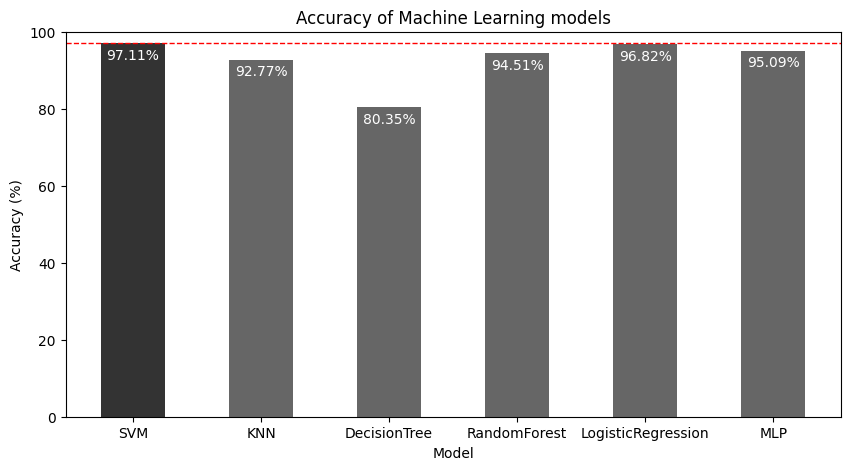

In [11]:
import matplotlib.pyplot as plt

model = ['SVM', 'KNN', 'DecisionTree', 'RandomForest', 'LogisticRegression', 'MLP']
acc = [0.9710982658959537, 0.9277456647398844, 0.8034682080924855, 0.9450867052023122, 0.9682080924855492, 0.9508670520231214]

# Convert accuracy to percentage
acc_percentage = [a * 100 for a in acc]

# Define colors for each bar
colors = ['0.2', '0.4', '0.4', '0.4', '0.4', '0.4']

plt.figure(figsize=(10, 5))
bars = plt.bar(model, acc_percentage, color=colors, width=0.5)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Machine Learning models')
plt.ylim([0, 100])  # Set the limits of the y-axis to 0-100

# Add the data value on head of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval-5, f'{yval:.2f}%', ha='center', va='bottom',color='white')

# Draw a horizontal line at the max accuracy
plt.axhline(max(acc_percentage), color='r', linestyle='--', linewidth=1)

plt.show()